In [1]:
# https://grouplens.org/datasets/movielens/25m/
# Folder: 'Movie Ratings Dataset' 

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1 align='center'>Analysis of Average Movie Rating for Box Office Underperformers</h1>

<h3>Do box office underperformers necessarily have low audience ratings? Are there any of those movies which underperformed at the time of the release but have gained popularity amongst the masses over the years?</h3>

For the analysis, considering the below movies from the link <a href='https://www.indiewire.com/gallery/best-films-box-office-bombs'>https://www.indiewire.com/gallery/best-films-box-office-bombs</a>
<br><br>
<li>Annihilation (2018)
<li>The Assassination of Jesse James by the Coward Robert Ford (2007) 
<li>Blade Runner 2049 (2017)
<li>Bottle Rocket (1996)
<li>Children of Men (2006)
<li>Cloud Atlas (2012)
<li>Dredd 3D (2012)
<li>Fight Club (1999)
<li>The Fountain (2006)
<li>Grindhouse (2007)

In [3]:
# Reading ratings dataset

ratings = pd.read_csv('./Movie Ratings Dataset/ratings.csv')
ratings.shape

(25000095, 4)

In [4]:
# Reading movies dataset

movies = pd.read_csv('./Movie Ratings Dataset/movies.csv')
movies.shape

(62423, 3)

In [5]:
# Checking ratings records

ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
# Checking the range of the ratings

print(f'Ratings range: {ratings.rating.min()} - {ratings.rating.max()}')

Ratings range: 0.5 - 5.0


Considering the fact that the ratings range is between 0.5-5, we will define 3 types of ratings for movies<br><br>
**(i)  High Rated Movies : [4.0,5.0] <br><br>
(ii) Average Rated Movies :  [2.0,4.0) <br><br>
(iii) Low Rated Movies : [0.5,2.0)** <br><br>

In [7]:
# Checking movies records

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Quick check to see if the underperformed movies mentioned in the link are present in the dataset.

print(movies[movies['title'].str.contains('Annihilation \(2018\)')]['title'].values)
print(movies[movies['title'].str.contains('Assassination of Jesse James by the Coward Robert Ford, The \(2007\)')]['title'].values)
print(movies[movies['title'].str.contains('Blade Runner 2049 \(2017\)')]['title'].values)
print(movies[movies['title'].str.contains('Bottle Rocket \(1996\)')]['title'].values)
print(movies[movies['title'].str.contains('Children of Men \(2006\)')]['title'].values)
print(movies[movies['title'].str.contains('Cloud Atlas \(2012\)')]['title'].values)
print(movies[movies['title'].str.contains('Dredd \(2012\)')]['title'].values)
print(movies[movies['title'].str.contains('Fight Club \(1999\)')]['title'].values)
print(movies[movies['title'].str.contains('Fountain, The \(2006\)')]['title'].values)
print(movies[movies['title'].str.contains('Grindhouse \(2007\)')]['title'].values)

['Annihilation (2018)']
['Assassination of Jesse James by the Coward Robert Ford, The (2007)']
['Blade Runner 2049 (2017)']
['Bottle Rocket (1996)']
['Children of Men (2006)']
['Cloud Atlas (2012)']
['Dredd (2012)']
['Fight Club (1999)']
['Fountain, The (2006)']
['Grindhouse (2007)']


In [9]:
# Mask to filter out the above movies from the dataset 

mask = ['Annihilation \(2018\)',
        'Assassination of Jesse James by the Coward Robert Ford, The \(2007\)',
        'Blade Runner 2049 \(2017\)',
        'Bottle Rocket \(1996\)',
        'Children of Men \(2006\)',
        'Cloud Atlas \(2012\)',
        'Dredd \(2012\)',
        'Fight Club \(1999\)',
        'Fountain, The \(2006\)',
        'Grindhouse \(2007\)'
       ]

box_office_underperformers = movies[movies.title.str.contains('|'.join(mask))]

In [10]:
# Checking the sub-dataframe of the underperformers from the movies dataset

box_office_underperformers

,movieId,title,genres
99,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
2867,2959,Fight Club (1999),Action|Crime|Drama|Thriller
11075,48043,"Fountain, The (2006)",Drama|Fantasy|Romance
11162,48774,Children of Men (2006),Action|Adventure|Drama|Sci-Fi|Thriller
11509,52281,Grindhouse (2007),Action|Crime|Horror|Sci-Fi|Thriller
11874,55363,Assassination of Jesse James by the Coward Rob...,Crime|Drama|Western
18491,96737,Dredd (2012),Action|Sci-Fi
18703,97752,Cloud Atlas (2012),Drama|Sci-Fi|IMAX
48302,176371,Blade Runner 2049 (2017),Sci-Fi
51241,182715,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller


In [11]:
# Creating a dataframe of all ratings for the underperformers. 
# This can be done by inner join of the sub-dataframe created in the above cell and the ratings dataset with movieId as key.

underperformer_ratings = box_office_underperformers.merge(ratings,on='movieId',how='inner')

In [12]:
# Checking the created dataframe 

underperformer_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,12,4.0,1255359683
1,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,57,4.5,1142400226
2,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,171,4.5,1074594930
3,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,201,4.0,938860807
4,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,226,3.5,1059575181


In [13]:
# Quick check on the number of ratings for each movie.

underperformer_ratings.groupby(['movieId','title']).rating.count()

movieId  title                                                             
101      Bottle Rocket (1996)                                                   4438
2959     Fight Club (1999)                                                     58773
48043    Fountain, The (2006)                                                   4536
48774    Children of Men (2006)                                                15063
52281    Grindhouse (2007)                                                      5324
55363    Assassination of Jesse James by the Coward Robert Ford, The (2007)     2627
96737    Dredd (2012)                                                           3495
97752    Cloud Atlas (2012)                                                     5750
176371   Blade Runner 2049 (2017)                                               5119
182715   Annihilation (2018)                                                    2017
Name: rating, dtype: int64

In [14]:
# Reviewing the ratings statistics for the underpeformers

underperformer_ratings.groupby(['movieId','title']).rating.describe()


,,count,mean,std,min,25%,50%,75%,max
movieId,title,,,,,,,,
101,Bottle Rocket (1996),4438.0,3.767350,0.881794,0.5,3.0,4.0,4.5,5.0
2959,Fight Club (1999),58773.0,4.228311,0.870319,0.5,4.0,4.5,5.0,5.0
48043,"Fountain, The (2006)",4536.0,3.607694,1.098224,0.5,3.0,4.0,4.5,5.0
48774,Children of Men (2006),15063.0,3.897896,0.871526,0.5,3.5,4.0,4.5,5.0
52281,Grindhouse (2007),5324.0,3.677029,0.962270,0.5,3.0,4.0,4.5,5.0
55363,"Assassination of Jesse James by the Coward Robert Ford, The (2007)",2627.0,3.661401,0.949519,0.5,3.0,4.0,4.5,5.0
96737,Dredd (2012),3495.0,3.569671,0.981699,0.5,3.0,3.5,4.0,5.0
97752,Cloud Atlas (2012),5750.0,3.567913,1.055408,0.5,3.0,3.5,4.5,5.0
176371,Blade Runner 2049 (2017),5119.0,3.914827,0.937565,0.5,3.5,4.0,4.5,5.0


In [15]:
# Checking the mean of the entire ratings dataset

np.mean(ratings.rating)

3.533854451353085

Text(8.85, 4.0, 'Mean rating= 3.5339')

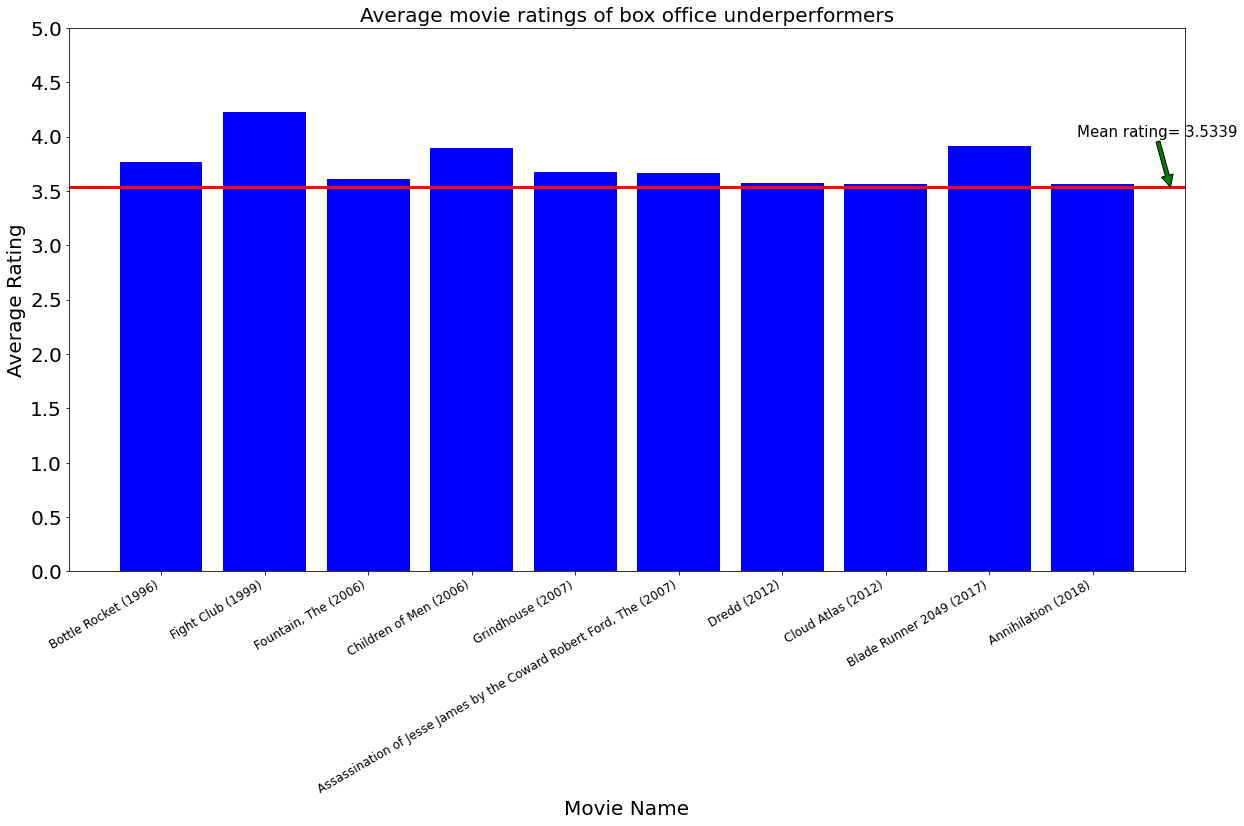

In [16]:
# Comparing the average ratings for the above movies against the average rating of the entire ratings dataset.
# Using a bar chart to visualize the same and the threshold for the mean of the ratings dataset is annotated 

avg = underperformer_ratings.groupby(['movieId','title']).rating.mean()

# Movie Names on the X-axis and Average Ratings on the Y-axis
x = [title for _,title in avg.index.values]
y = avg.values

plt.figure(figsize=(20,10))
plt.bar(x, y, color = 'blue')

# Y-axis going from 0 to 5 as per the ratings to create an honest visualization.
plt.xticks(rotation=30,fontsize=12,horizontalalignment='right')
plt.yticks(np.arange(0.0,5.01,0.5),fontsize=20)

# Setting the Axes labels and title of the bar chart
plt.xlabel(xlabel = 'Movie Name',fontsize=20,horizontalalignment='center')
plt.ylabel(ylabel = 'Average Rating',fontsize=20)
plt.title('Average movie ratings of box office underperformers',fontsize=20)

# Plotting a horizontal line to indicate the mean rating of the entire ratings dataset and creating an annotation for the same.

plt.axhline(y=ratings.rating.mean(), color='r', linestyle='solid',linewidth=3)

plt.annotate(f'Mean rating= {np.mean(ratings.rating):1.4f}',
             xy=(9.75,np.mean(ratings.rating)),
             xycoords='data',
             xytext=(8.85, 4.0),
             textcoords='data',
             fontsize=15,
             arrowprops=dict(facecolor='green'))

A quick glance at the results shows that: <br>
(i) All of the selected movies have an average rating above 3.534 (mean of ratings dataset) <br>
(ii) It means that they belong to the average rated movies according to the categorization earlier. <br>
(iii) Also, in the range of average rated movies, they are in the top 25% percent (3.5-4). <br>
**(iv) Additionally, Fight Club (1999) which has an movie average rating over 4 is a high rated movie and seemingly an outlier.**

In [17]:
# Continuing further analysis for Fight Club Movie which has the highest average rating
# Converting UNIX timestamp to datetime and adding as a column to the sub-dataframe

underperformer_ratings['parsed_time'] = pd.to_datetime(underperformer_ratings['timestamp'],unit='s')

In [18]:
underperformer_ratings

,movieId,title,genres,userId,rating,timestamp,parsed_time
0,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,12,4.0,1255359683,2009-10-12 15:01:23
1,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,57,4.5,1142400226,2006-03-15 05:23:46
2,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,171,4.5,1074594930,2004-01-20 10:35:30
3,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,201,4.0,938860807,1999-10-02 10:40:07
4,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,226,3.5,1059575181,2003-07-30 14:26:21
...,...,...,...,...,...,...,...
107137,182715,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller,162335,4.5,1571016207,2019-10-14 01:23:27
107138,182715,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller,162349,5.0,1551623659,2019-03-03 14:34:19
107139,182715,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller,162400,4.0,1558853777,2019-05-26 06:56:17
107140,182715,Annihilation (2018),Adventure|Mystery|Sci-Fi|Thriller,162516,3.5,1531712401,2018-07-16 03:40:01


In [19]:
# Getting all the ratings for Fight Club movie. 

fight_club_movie_ratings = underperformer_ratings[underperformer_ratings.title.str.contains('Fight Club')]

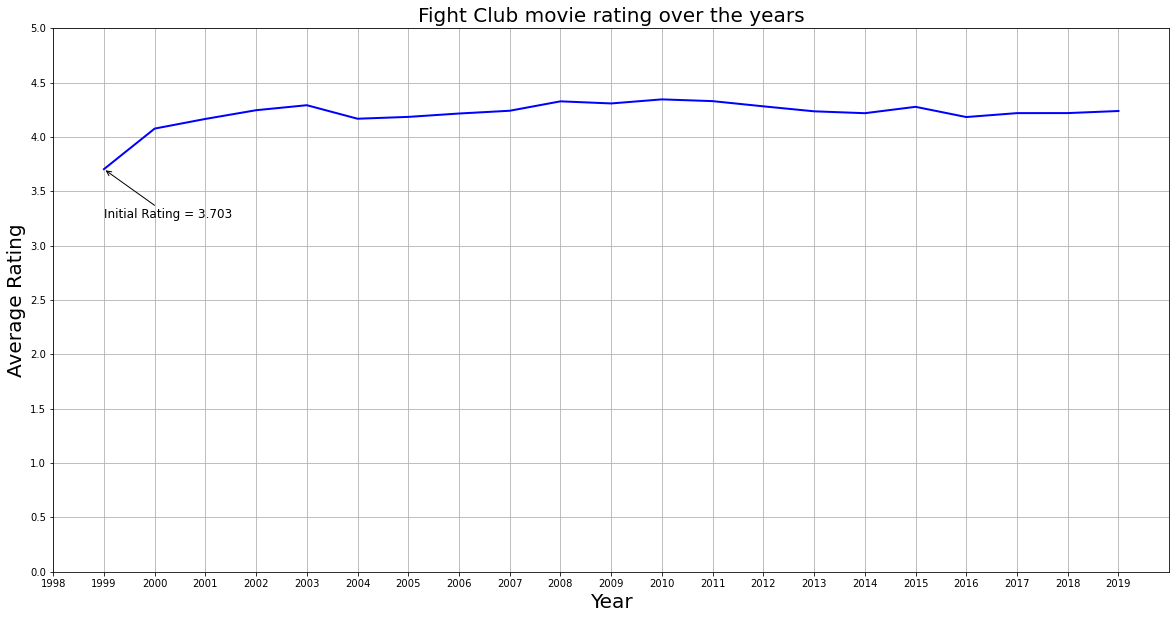

In [20]:
# Plotting the average ratings for Fight Club movie over the years using a line chart.
avg = fight_club_movie_ratings.groupby(fight_club_movie_ratings['parsed_time'].dt.year).rating.mean()

# Year on the X-axis and Average rating on the Y-axis
x = avg.index.values
y = avg.values

plt.figure(figsize=(20,10))

plt.xlabel('Year',fontsize=20)
plt.ylabel('Average Rating',fontsize=20)
plt.title('Fight Club movie rating over the years',fontsize=20)

plt.xticks(np.arange(1998,2020,1),fontsize=10)
plt.yticks(np.arange(0.0,5.01,0.5),fontsize=10)

plt.plot(x,y,linewidth=2,color='blue')

plt.axis([1998, 2020,0,5])

plt.grid(True)

# Annotating the Initial Rating in release year 1999
plt.annotate(f'Initial Rating = {y[0]:1.3f}',
             xy=(1999,y[0]),
             xycoords='data',
             xytext=(1999, 3.25),
             textcoords='data',
             fontsize=12,
             arrowprops=dict(arrowstyle='->',color='black',connectionstyle='arc3'))

plt.show()

In [21]:
# Checking the correlation between year and average rating for Fight Club movie

np.corrcoef(x,y)

array([[1.       , 0.4463581],
       [0.4463581, 1.       ]])

From the above analysis, it can be inferred that: <br>
(i) Fight Club movie had the lowest average rating (3.703) at the time of it's release(1999). <br>
(ii) The rating increased and went up to beyond 4 in the very next year(2000). <br>
(iii) Since then, the rating has remained above 4 till 2019 with some minor fluctuations.<br>
(iv) The average rating has a fairly moderate positive correlation (0.45) with the year. <br>

**This analysis answers the earlier research question that box office underperformers are not necessarily low rated movies. From the examples considered above, all the movies had a greater rating than the average of the dataset with a select few like Fight Club gaining great ratings and becoming cult classics post their release till date.**